<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['Churn'] = df['Churn'].astype('int') 

In [4]:
def results(y_train, y_test, prediction_train, prediction_test):
    print('-'*60)
    print('Training accuracy Score:', accuracy_score(y_train, prediction_train))
    print('Testing accuracy Score:', accuracy_score(y_test, prediction_test))

    print('-'*60)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))

    print('-'*60)
    print('Classification Matrix:')
    print(classification_report(y_test, prediction_test))

## Seperate x, y and make dummy vatriables 

In [5]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No_phone',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Payment

In [6]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_No','MultipleLines_No_phone',
        'InternetService_No','OnlineSecurity_No_internet','OnlineBackup_No_internet',
        'DeviceProtection_No_internet', 'TechSupport_No_internet', 'StreamingTV_No_internet',
        'StreamingMovies_No_internet', 'Contract_Two_year', 'PaperlessBilling_No', 
         'PaymentMethod_Mailed_check'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_One_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

In [8]:
# make a test-train split
from sklearn.model_selection import train_test_split
split_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=0)

In [9]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (4922, 30)(4922,)
Test dataset: (2110, 30)(2110,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# fit the baseline model 
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

#predictions
prediction_train = logmodel.predict(X_train)
prediction_test = logmodel.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.8061763510767981
Testing accuracy Score: 0.8018957345971564
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1397  158  1555
1           260  295   555
All        1657  453  2110
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

Using TensorFlow backend.


1    3608
0    3608
dtype: int64


In [13]:
logmodel = LogisticRegression(C=100, solver='liblinear')
logmodel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#predictions
prediction_train = logmodel.predict(X_train)
prediction_test = logmodel.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7576188541243397
Testing accuracy Score: 0.7554502369668247
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1148  407  1555
1           109  446   555
All        1257  853  2110
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1555
           1       0.52      0.80      0.63       555

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.76      0.77      2110



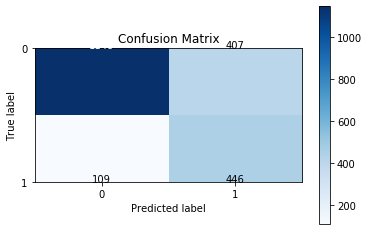

In [15]:
import itertools

# Create the basic matrix
cnf_matrix=confusion_matrix(y_test, prediction_test)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.9983746444534742
Testing accuracy Score: 0.6985781990521327
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1223  332  1555
1           304  251   555
All        1527  583  2110
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1555
           1       0.43      0.45      0.44       555

    accuracy                           0.70      2110
   macro avg       0.62      0.62      0.62      2110
weighted avg       0.70      0.70      0.70      2110



In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = list(X_train.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.583947 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.583947 to fit

